Niharika Dalsania <br>
SID: 201701438 <br>
DL Lab Assignment 2 - Forward Propogation

**IMPORT LIBRARIES**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**FORWARD PROPOGATE FUNCTION**

In [2]:
# Define forward propogation function with following parameters

# X - input layer
# num - number of layers including input layer, hidden layers and output layer (i = 0 input layer, i = num-1 output layer)
# p - number of nodes in all layers including input and output layer
# act - activation function to be used at each level

def forward_prop(X, num, p, act):

  for i in range(1, num):

    # weights and biases of edges connecting input layer[i] and layer[i-1]
    W = tf.random.normal([p[i],p[i-1]], 0, 1, tf.float64)
    B = tf.tile(tf.random.normal([p[i], 1], 0, 1, tf.float64), [1, X.shape[1]])

    # forward propogate from layer[i-1] to layer[i]
    Z = tf.add(tf.linalg.matmul(W, X), B)
    Z = act[i-1](Z)
    X = tf.Variable(Z, dtype = tf.float64)

  return X

# **QUESTION 1 - CLASSIFICATION**

**LOAD THE DATASET**

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# typecast train images into float and labels into int
# flatten the train images
train_images = (train_images).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
tf.print("Dimension of loaded train images set:", train_images.shape)
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
tf.print("Dimension of flattened train images set:", train_images.shape)

# typecast test images into float and labels into int
# flatten the test images
test_images = (test_images).astype(np.float32)
test_labels = (test_labels).astype(np.int64)
tf.print("Dimension of loaded test images set:", test_images.shape)
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
tf.print("Dimension of flattened test images set:", test_images.shape)

Dimension of loaded train images set: (60000, 28, 28)
Dimension of flattened train images set: (60000, 784)
Dimension of loaded test images set: (10000, 28, 28)
Dimension of flattened test images set: (10000, 784)


**PRINTING SAMPLE CONFUSION MATRIX AND ACCURACY**

In [4]:
num = tf.constant(5, dtype = tf.int64)
p = tf.constant([train_images.shape[1], 512, 256, 128, 10], dtype = tf.int64)
act = [tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid]
X = tf.cast(tf.transpose(train_images), dtype=tf.float64)
labels = train_labels

output = forward_prop(X, num, p, act)
pred = tf.math.argmax(output, axis = 0)

accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, labels), tf.float64))
tf.print("Accuracy: ", accuracy*100, "%\n")
tf.print("Confusion Matrix:")
tf.print(tf.math.confusion_matrix(labels, pred), summarize=-1)

Accuracy:  9.045 %

Confusion Matrix:
[[0 0 0 0 0 237 4679 0 0 1007]
 [0 0 0 0 0 1240 4569 0 0 933]
 [0 0 0 0 0 464 3844 0 0 1650]
 [0 0 0 0 0 447 3946 0 0 1738]
 [0 0 0 0 0 584 4262 0 0 996]
 [0 0 0 0 0 697 3796 0 0 928]
 [0 0 0 0 0 990 3982 0 0 946]
 [0 0 0 0 0 269 5200 0 0 796]
 [0 0 0 0 0 480 4468 0 0 903]
 [0 0 0 0 0 620 4581 0 0 748]]


**OBSERVING EFFECT OF BATCH SIZE**

Batch Size 256 : Accuracy =  10.179620726495726 %
Batch Size 512 : Accuracy =  10.006009615384615 %
Batch Size 1024 : Accuracy =  9.9912446120689662 %
Batch Size 2048 : Accuracy =  10.073747306034482 %
Batch Size 4096 : Accuracy =  10.147530691964286 %
Batch Size 8192 : Accuracy =  9.0733119419642865 %
Batch Size 16384 : Accuracy =  10.935465494791666 %
Batch Size 60000 : Accuracy =  8.1166666666666671 %



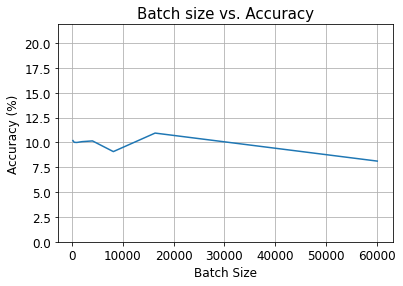

In [5]:
num = tf.constant(5, dtype = tf.int64)
p = tf.constant([train_images.shape[1], 512, 256, 128, 10], dtype = tf.int64)
act = [tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid]

# array of batch sizes
batch_sizes = tf.constant([256, 512, 1024, 2048, 4096, 8192, 16384, train_images.shape[0]], dtype = tf.int64)

# initialize accuracies array for different batch sizes
accuracies = []

# loop over all batch sizes
for batch_size in batch_sizes:
    
    # initialize arrays for accuracy of each batch for a particular batch size
    batch_acc = []

    # take different batches and calculate accuracy for each batch separately
    for i in range(train_images.shape[0] // batch_size):
      
      # input layer and corresponding labels of batch size
      X = tf.Variable(tf.cast(tf.transpose(train_images[i*batch_size:(i+1)*batch_size]), dtype=tf.float64))
      labels = tf.Variable(train_labels[i*batch_size:(i+1)*batch_size])
      
      # forward propogate and make prediction
      output = forward_prop(X, num, p, act)
      pred = tf.math.argmax(output, axis = 0)
      
      # calculate accuracy of each batch
      accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, labels), tf.float64))
      batch_acc.append(accuracy*100)

    # take average accuracy obtained across all batches for a particular batch size
    accuracies.append(tf.divide(sum(batch_acc),len(batch_acc)))
    tf.print("Batch Size", batch_size, ": Accuracy = ", tf.divide(sum(batch_acc),len(batch_acc)), "%")

# plot accuracy for different batch sizes
tf.print()
plt.plot(batch_sizes, accuracies)
plt.title("Batch size vs. Accuracy", fontsize = 15)
plt.xlabel("Batch Size", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
plt.ylim(0, 2*max(accuracies))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

Observation: Since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So changing batch size does not really affect the accuracy a lot and it remains poor throughout. So, from here on, we will use standard batch size 256. Since the weights and biases are initialised randomly, these accuracies might change with every run. 

**OBSERVING EFFECTS OF NUMBER OF NODES IN HIDDEN LAYERS**

Accuracy for  5  nodes in each hidden layer:  7.421875 %
Accuracy for  50  nodes in each hidden layer:  10.546875 %
Accuracy for  500  nodes in each hidden layer:  9.765625 %
Accuracy for  5000  nodes in each hidden layer:  8.984375 %



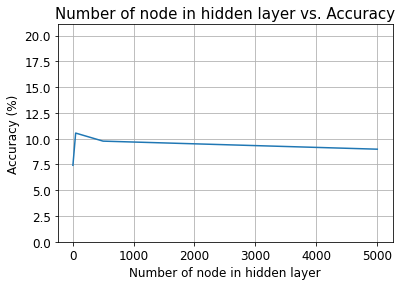

In [6]:
num = tf.constant(5, dtype = tf.int64)
batch_size = tf.constant(256, dtype = tf.int64)
act = [tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid]

# array of different numbers of nodes to be taken every time, same for each layer
nodes = tf.constant([5, 50, 500, 5000], dtype = tf.int64)

# initialize accuracies array for different batch sizes
accuracies = []

for n in nodes:

  p = tf.Variable([train_images.shape[1], int(n), int(n), int(n), 10], dtype = tf.int64)

  X = tf.cast(tf.transpose(train_images[:batch_size]), dtype=tf.float64)
  labels = train_labels[:batch_size]
  
  # forward propogate and make prediction
  output = forward_prop(X, num, p, act)
  pred = tf.math.argmax(output, axis = 0)

  accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, labels), tf.float64))
  tf.print("Accuracy for ", n, " nodes in each hidden layer: ", accuracy*100, "%")
  accuracies.append(accuracy*100)

# plot accuracy for different number of nodes
tf.print()
plt.plot(nodes, accuracies)
plt.title("Number of node in hidden layer vs. Accuracy", fontsize = 15)
plt.xlabel("Number of node in hidden layer", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
plt.ylim(0, 2*max(accuracies))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

Observation: Here again, since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So increasing number of nodes i.e. interconnections does not really affect the accuracy a lot (while it should have ideally increased upto some point until overfitting starts) and it remains poor throughout. So, from here on, we will use decreasing number of nodes 512, 256 and 128 nodes in all the following hidden layers. Since the weights and biases are initialised randomly, these accuracies might change with every run.

**OBSERVING EFFECT OF NUMBER OF HIDDEN LAYERS (additional analysis)**

Accuracy for  5  hidden layer:  8.984375 %
Accuracy for  6  hidden layer:  12.890625 %
Accuracy for  7  hidden layer:  14.84375 %
Accuracy for  8  hidden layer:  8.984375 %
Accuracy for  9  hidden layer:  8.984375 %



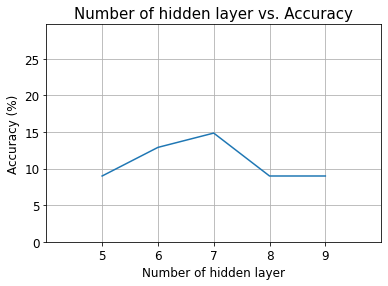

In [7]:
num = tf.constant([5, 6, 7, 8, 9], dtype = tf.int64)
batch_size = tf.constant(256, dtype = tf.int64)

# initialize accuracies array for different number of hidden layers
accuracies = []

for n in num:

  p = tf.constant([train_images.shape[1], 512, 256], dtype = tf.int64)
  for i in range(int(n)-4):
    p = tf.concat([p, tf.constant([128], dtype = tf.int64)], axis=0)
  p = tf.concat([p, tf.constant([10], dtype = tf.int64)], axis=0)

  act = [tf.math.sigmoid] * int(n-1)

  X = tf.cast(tf.transpose(train_images[:batch_size]), dtype=tf.float64)
  labels = train_labels[:batch_size]
  
  # forward propogate and make prediction
  output = forward_prop(X, int(n), p, act)
  pred = tf.math.argmax(output, axis = 0)

  accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, labels), tf.float64))
  tf.print("Accuracy for ", n, " hidden layer: ", accuracy*100, "%")
  accuracies.append(accuracy*100)

# plot accuracy for different number of hidden layers
tf.print()
plt.plot(num, accuracies)
plt.title("Number of hidden layer vs. Accuracy", fontsize = 15)
plt.xlabel("Number of hidden layer", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
plt.xlim(4, 10)
plt.ylim(0, 2*max(accuracies))
plt.xticks(num, fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

Observation: Here again, since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So increasing number of hidden layers does not really affect the accuracy a lot (while it should have ideally increased upto some point until overfitting starts) and it remains poor throughout. So we limit our model to 3 hidden layers only. Since the weights and biases are initialised randomly, these accuracies might change with every run.

**OBSERVING EFFECT OF ACTIVATION FUNCTIONS**

In [8]:
n = tf.constant(5, dtype = tf.int64)
batch_size = tf.constant(256, dtype = tf.int64)
p = tf.constant([train_images.shape[1], 512, 256, 128, 10], dtype = tf.int64)

hidden_layer1_act = [tf.math.sigmoid, tf.math.tanh]
hidden_layer2_act = [tf.nn.relu, tf.math.tanh]
hidden_layer3_act = [tf.math.sigmoid, tf.nn.relu]
out_layer_act = [tf.math.sigmoid, tf.math.tanh, tf.nn.softmax]

act1 = []
act2 = []
act3 = []
actout = []
acc = []

for a1 in hidden_layer1_act:
  for a2 in hidden_layer2_act:
    for a3 in hidden_layer3_act:
      for a4 in out_layer_act:

        act = [a1, a2, a3, a4]
        X = tf.cast(tf.transpose(train_images[:batch_size]), dtype=tf.float64)
        labels = train_labels[:batch_size]
        
        # forward propogate and make prediction
        output = forward_prop(X, n, p, act)
        pred = tf.math.argmax(output, axis = 0)

        accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, labels), tf.float64))
        act1.append(str(a1).split(' ')[1])
        act2.append(str(a2).split(' ')[1])
        act3.append(str(a3).split(' ')[1])
        actout.append(str(a4).split(' ')[1])
        acc.append(float(accuracy*100))

pd.DataFrame(list(zip(act1, act2, act3, actout, acc)), columns = ['First layer', 'Second layer', 'Third layer', 'Output layer', 'Accuracy (%)'])

,First layer,Second layer,Third layer,Output layer,Accuracy (%)
0,sigmoid,relu,sigmoid,sigmoid,8.203125
1,sigmoid,relu,sigmoid,tanh,12.890625
2,sigmoid,relu,sigmoid,softmax_v2,10.546875
3,sigmoid,relu,relu,sigmoid,15.234375
4,sigmoid,relu,relu,tanh,11.718750
5,sigmoid,relu,relu,softmax_v2,9.765625
6,sigmoid,tanh,sigmoid,sigmoid,9.765625
7,sigmoid,tanh,sigmoid,tanh,8.203125
8,sigmoid,tanh,sigmoid,softmax_v2,6.640625
9,sigmoid,tanh,relu,sigmoid,11.718750


Observation: Here again, since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So the accuracy does not change a lot with any combination of activation function. What effects changing limiting values via activation functions have can be analysed better if we allow backpropogation and look at issues like gradient descent then. Grossly, no particular function evidently seems the best option for output layer, though we would have expected softmax or sigmoid. Since the weights and biases are initialised randomly, these conclusions based on accuracies might change with every run.

# **QUESTION 2 - REGRESSION**

**LOAD THE DATASET**

In [9]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


**CALCULATE MSE**

In [10]:
num = tf.constant(5, dtype = tf.int64)
p = tf.constant([X_train.shape[1], 512, 256, 128, 1], dtype = tf.int64)
act = [tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid]
X = tf.cast(tf.transpose(X_train), dtype=tf.float64)
labels = y_train

output = forward_prop(X, num, p, act)
mse = tf.keras.losses.MSE(labels, output)
tf.print("MSE:", mse)

MSE: [585.67821408804707]


**OBSERVE EFFECT OF BATCH SIZE**

Batch Size 50 : MSE =  [413.15441774114271]
Batch Size 100 : MSE =  [380.70762933593]
Batch Size 150 : MSE =  [367.56570415830691]
Batch Size 200 : MSE =  [241.01126214927615]
Batch Size 250 : MSE =  [554.55872]
Batch Size 300 : MSE =  [553.05630000000008]
Batch Size 350 : MSE =  [589.82331428571422]
Batch Size 404 : MSE =  [574.17692029051193]



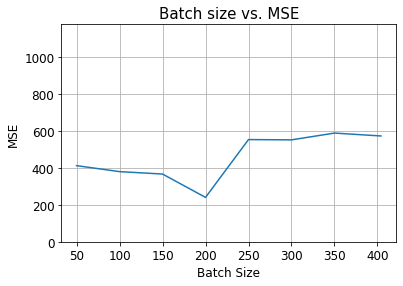

In [11]:
num = tf.constant(5, dtype = tf.int64)
p = tf.constant([X_train.shape[1], 512, 256, 128, 1], dtype = tf.int64)
act = [tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid, tf.nn.relu]

# array of batch sizes
batch_sizes = tf.constant([50, 100, 150, 200, 250, 300, 350, 404], dtype = tf.int64)

# initialize mse array for different batch sizes
mse = []

# loop over all batch sizes
for batch_size in batch_sizes:
    
    # initialize arrays for mse of each batch for a particular batch size
    batch_mse = []

    # take different batches and calculate mse for each batch separately
    for i in range(X_train.shape[0] // batch_size):
      
      # input layer and corresponding labels of batch size
      X = tf.Variable(tf.cast(tf.transpose(X_train[i*batch_size:(i+1)*batch_size]), dtype=tf.float64))
      labels = tf.Variable(y_train[i*batch_size:(i+1)*batch_size])
      
      # forward propogate and make prediction
      output = forward_prop(X, num, p, act)
      MSE = tf.keras.losses.MSE(labels, output)
      batch_mse.append(MSE)

    # take average mse obtained across all batches for a particular batch size
    mse.append(tf.divide(sum(batch_mse),len(batch_mse)))
    tf.print("Batch Size", batch_size, ": MSE = ", tf.divide(sum(batch_mse),len(batch_mse)))

# plot mse for different batch sizes
tf.print()
plt.plot(batch_sizes, mse)
plt.title("Batch size vs. MSE", fontsize = 15)
plt.xlabel("Batch Size", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.ylim(0, 2*max(mse))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

Observation: Since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So changing batch size does not really affect the MSE a lot and it remains high throughout. So, from here on, we will use entire dataset which has just 404 examples and take no batches. Since the weights and biases are initialised randomly, these MSE might change with every run. 

**OBSERVIG EFFECT OF NUMBER OF NODES IN HIDDEN LAYER**

MSE for 5 nodes in hidden layers: [586.1604950495049]
MSE for 50 nodes in hidden layers: [562.37239981236394]
MSE for 500 nodes in hidden layers: [116.49546871563636]
MSE for 5000 nodes in hidden layers: [574.44132253984174]



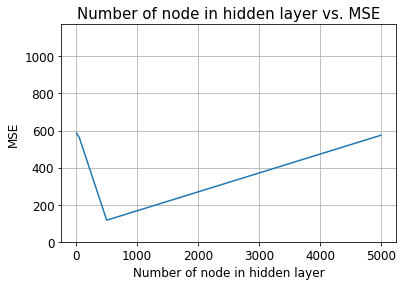

In [12]:
num = tf.constant(5, dtype = tf.int64)
act = [tf.math.sigmoid, tf.math.sigmoid, tf.math.sigmoid, tf.nn.relu]

# array of different numbers of nodes to be taken every time, same for each layer
nodes = tf.constant([5, 50, 500, 5000], dtype = tf.int64)

# initialize mse array for different batch sizes
mse = []

for n in nodes:

  p = tf.Variable([X_train.shape[1], int(n), int(n), int(n), 1], dtype = tf.int64)

  X = tf.cast(tf.transpose(X_train), dtype=tf.float64)
  labels = y_train
  
  # forward propogate and make prediction
  output = forward_prop(X, num, p, act)
  MSE = tf.keras.losses.MSE(labels, output)
  mse.append(MSE)
  tf.print("MSE for", int(n), "nodes in hidden layers:", MSE)

# plot mse for different number of nodes
tf.print()
plt.plot(nodes, mse)
plt.title("Number of node in hidden layer vs. MSE", fontsize = 15)
plt.xlabel("Number of node in hidden layer", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.ylim(0, 2*max(mse))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

Observation: Here again, since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So increasing number of nodes i.e. interconnections does not really affect the MSE a lot (while it should have ideally decreased upto some point until overfitting starts) and it remains high throughout. So, from here on, we will use decreasing number of nodes 512, 256 and 128 nodes in all the following hidden layers. Since the weights and biases are initialised randomly, these MSE might change with every run.

**OBSERVING EFFECT OF NUMBER OF LAYERS (additional analysis)**

MSE for  5 hidden layers: [148.06779327310136]
MSE for  6 hidden layers: [586.1604950495049]
MSE for  7 hidden layers: [470.03342416845618]
MSE for  8 hidden layers: [559.44371997394808]
MSE for  9 hidden layers: [394.43569372389442]



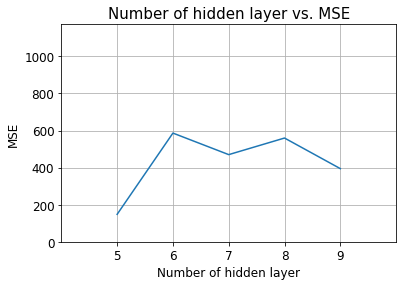

In [13]:
num = tf.constant([5, 6, 7, 8, 9], dtype = tf.int64)

# initialize accuracies array for different number of hidden layers
mse = []

for n in num:

  p = tf.constant([X_train.shape[1], 512, 256], dtype = tf.int64)
  for i in range(int(n)-4):
    p = tf.concat([p, tf.constant([128], dtype = tf.int64)], axis=0)
  p = tf.concat([p, tf.constant([1], dtype = tf.int64)], axis=0)

  act = [tf.math.sigmoid] * int(n-2)
  act.append(tf.nn.relu)

  X = tf.cast(tf.transpose(X_train), dtype=tf.float64)
  labels = y_train
  
  # forward propogate and make prediction
  output = forward_prop(X, int(n), p, act)
  MSE = tf.keras.losses.MSE(labels, output)
  mse.append(MSE)
  tf.print("MSE for ", int(n), "hidden layers:", MSE)


# plot accuracy for different number of hidden layers
tf.print()
plt.plot(num, mse)
plt.title("Number of hidden layer vs. MSE", fontsize = 15)
plt.xlabel("Number of hidden layer", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.xlim(4, 10)
plt.ylim(0, 2*max(mse))
plt.xticks(num, fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

Observation: Here again, since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So increasing number of hidden layers does not really affect the MSE a lot (while it should have ideally decreased upto some point until overfitting starts) and it remains high throughout. So we limit our model to 3 hidden layers only. Since the weights and biases are initialised randomly, these MSE might change with every run.

**OBSERVING EFFECT OF ACTIVATION FUNCTIONS**

In [14]:
n = tf.constant(5, dtype = tf.int64)
p = tf.constant([X_train.shape[1], 512, 256, 128, 1], dtype = tf.int64)

hidden_layer1_act = [tf.math.sigmoid, tf.math.tanh]
hidden_layer2_act = [tf.nn.relu, tf.math.tanh]
hidden_layer3_act = [tf.math.sigmoid, tf.nn.relu]
out_layer_act = [tf.math.sigmoid, tf.math.tanh, tf.nn.softmax]

act1 = []
act2 = []
act3 = []
actout = []
mse = []

for a1 in hidden_layer1_act:
  for a2 in hidden_layer2_act:
    for a3 in hidden_layer3_act:
      for a4 in out_layer_act:

        act = [a1, a2, a3, a4]
        X = tf.cast(tf.transpose(X_train), dtype=tf.float64)
        labels = y_train
        
        # forward propogate and make prediction
        output = forward_prop(X, n, p, act)
        MSE = tf.keras.losses.MSE(labels, output)

        act1.append(str(a1).split(' ')[1])
        act2.append(str(a2).split(' ')[1])
        act3.append(str(a3).split(' ')[1])
        actout.append(str(a4).split(' ')[1])
        mse.append(float(MSE))

pd.DataFrame(list(zip(act1, act2, act3, actout, mse)), columns = ['First layer', 'Second layer', 'Third layer', 'Output layer', 'MSE'])

,First layer,Second layer,Third layer,Output layer,MSE
0,sigmoid,relu,sigmoid,sigmoid,543.813990
1,sigmoid,relu,sigmoid,tanh,631.941001
2,sigmoid,relu,sigmoid,softmax_v2,586.032747
3,sigmoid,relu,relu,sigmoid,586.160495
4,sigmoid,relu,relu,tanh,543.105039
5,sigmoid,relu,relu,softmax_v2,586.138218
6,sigmoid,tanh,sigmoid,sigmoid,583.316370
7,sigmoid,tanh,sigmoid,tanh,564.224973
8,sigmoid,tanh,sigmoid,softmax_v2,586.103939
9,sigmoid,tanh,relu,sigmoid,584.422334


Observation: Here again, since we are only forward propogating, the weights and biases are never adjusted, essentially the model learns nothing. So the MSE does not change a lot with any combination of activation function. What effects changing limiting values via activation functions have can be analysed better if we allow backpropogation and look at issues like gradient descent then. Grossly, no particular function evidently seems the best option for output layer, though we would have expected softmax or sigmoid. Since the weights and biases are initialised randomly, these conclusions based on MSE might change with every run.